In [2]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
ignitProb = 0.4
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    #Makes fire in the middle
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

import pycxsimulator
pycxsimulator.GUI().start(func=[init,draw,step])

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/oscarengelbrektson/anaconda/lib/python3.6/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/Users/oscarengelbrektson/anaconda/lib/python3.6/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/Users/oscarengelbrektson/Documents/Minerva/CS166 - Simulation, Modelling/pycxsimulator.py", line 238, in stepModel
    self.status.configure(foreground='black')
  File "/Users/oscarengelbrektson/anaconda/lib/python3.6/tkinter/__init__.py", line 1485, in configure
    return self._configure('configure', cnf, kw)
  File "/Users/oscarengelbrektson/anaconda/lib/python3.6/tkinter/__init__.py", line 1476, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!label"


# Sayama Exercise 12.8.
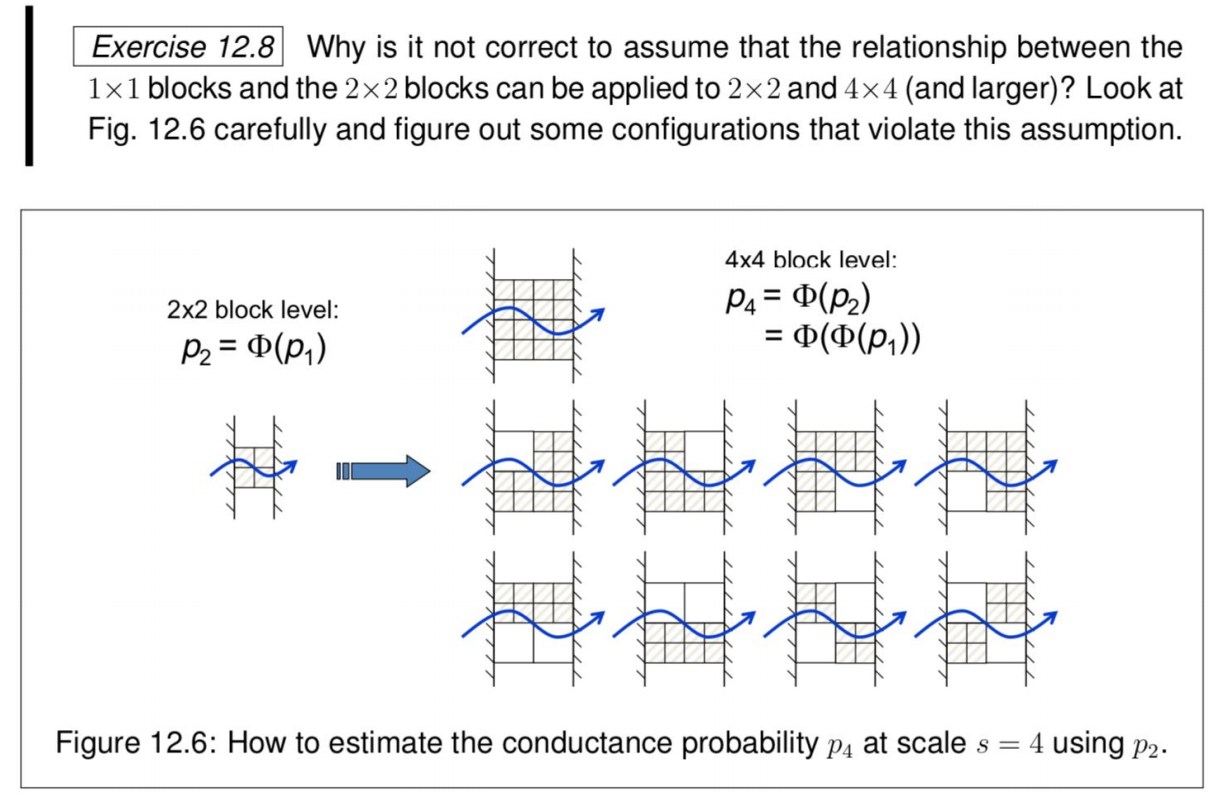

In general, trees are not guaranteed to cluster in nxn blocks. The only exception to this is the special case of 1x1.

It is not correct to assume that the relationship between 1x1 blocks and 2x2 blocks can be applied to 2x2 blocks and 4x4 blocks (and larger), because 1x1 blocks are the smallest possible portions of the space, whilst 2x2 or larger are not. This means that by exploring all the 1x1 block combinations, you have exhausted all possible combinations. However, as trees are not necessarily clustered in 2x2 (or larger) groups, by exploring all 2x2 blocks does not exhaust all possible combinations of trees in the space.

# (Optional) Stretch Goal
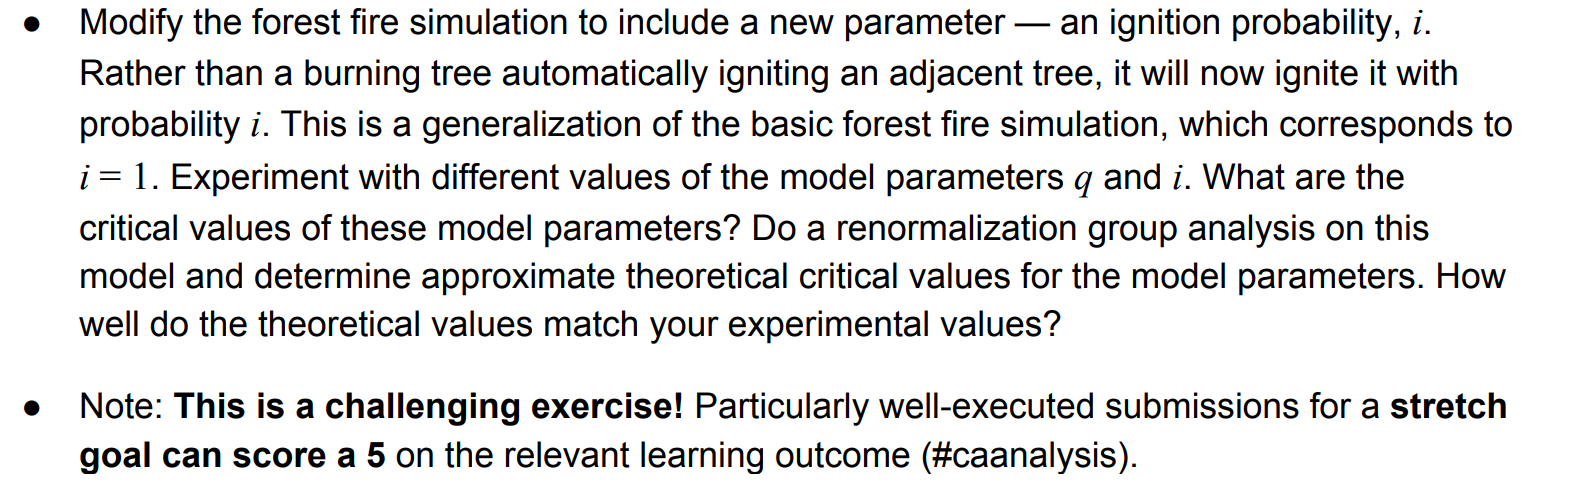

We modify the function by adding an if-statement in the step() function. Such that there is an i probability that that a tree will ignite if a neighbour is on fire:

    if RD.random() <= ignitProb:
         state = fire

In [31]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP
import numpy as np

RD.seed()

width = 100
height = 100
initProb = 0.4
ignitProb = 0.4
empty, tree, fire, char = range(4)
density = None

def init():
    global time, config, nextConfig, density

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    #Makes fire in the middle
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))
    
def record_density():
    '''
    Appends the proportion of panicky individuals 
    in current state to density_list
    '''
    global time, config, nextConfig, density
    alive = np.count_nonzero(config==tree)
    burning = np.count_nonzero(config==fire)
    burnt = np.count_nonzero(config==char)
    density = (burning+burnt)/(alive+burning+burnt)


def step():
    global time, config, nextConfig, density

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            #If the neighbouring tree is on fire, see if it spreads
                            if RD.random() <= ignitProb:
                                state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

#import pycxsimulator
#pycxsimulator.GUI().start(func=[init,draw,step])

def run_sim(steps, q, i):
    initProb = q
    ignitProb = i
    
    init()
    for i in range(steps):
        step()
    record_density()
    
    return density

## Investigate long-term percolation levels as a function of q and i

In [33]:
steps = 100

long_term_behavior_list = []
initial_proportion_list = []
ignite_propotion_list = []
#Vary initial proportion of trees, starting at 10%, increment by 10%
for percentage in range(10, 110, 10):
    q = percentage/100
    
    #Vary ignite probability i, starting at 10%, increment by 5%
    for ignite_percentage in range(10, 110, 10):
        
        i = ignite_percentage/100
        
        #Record i, q, and percolation after #steps
        initial_proportion_list.append(q)
        ignite_propotion_list.append(i)
        
        #Run simulation
        initProb = q
        ignitProb = i
        
        init()
        for i in range(100):
            step()
        record_density()
        
        #Store density at last time step of simulation
        long_term_behavior_list.append(density)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

#Map to a 10x10 matrix
heatmap = np.zeros(shape=(10, 10))
for row in list(range(0, 10)):
    for col in range(0, 10):
        heatmap[row, col] = long_term_behavior_list[10*row+col]


#Make a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap)
plt.xlabel('i')
plt.ylabel('p')
plt.show()

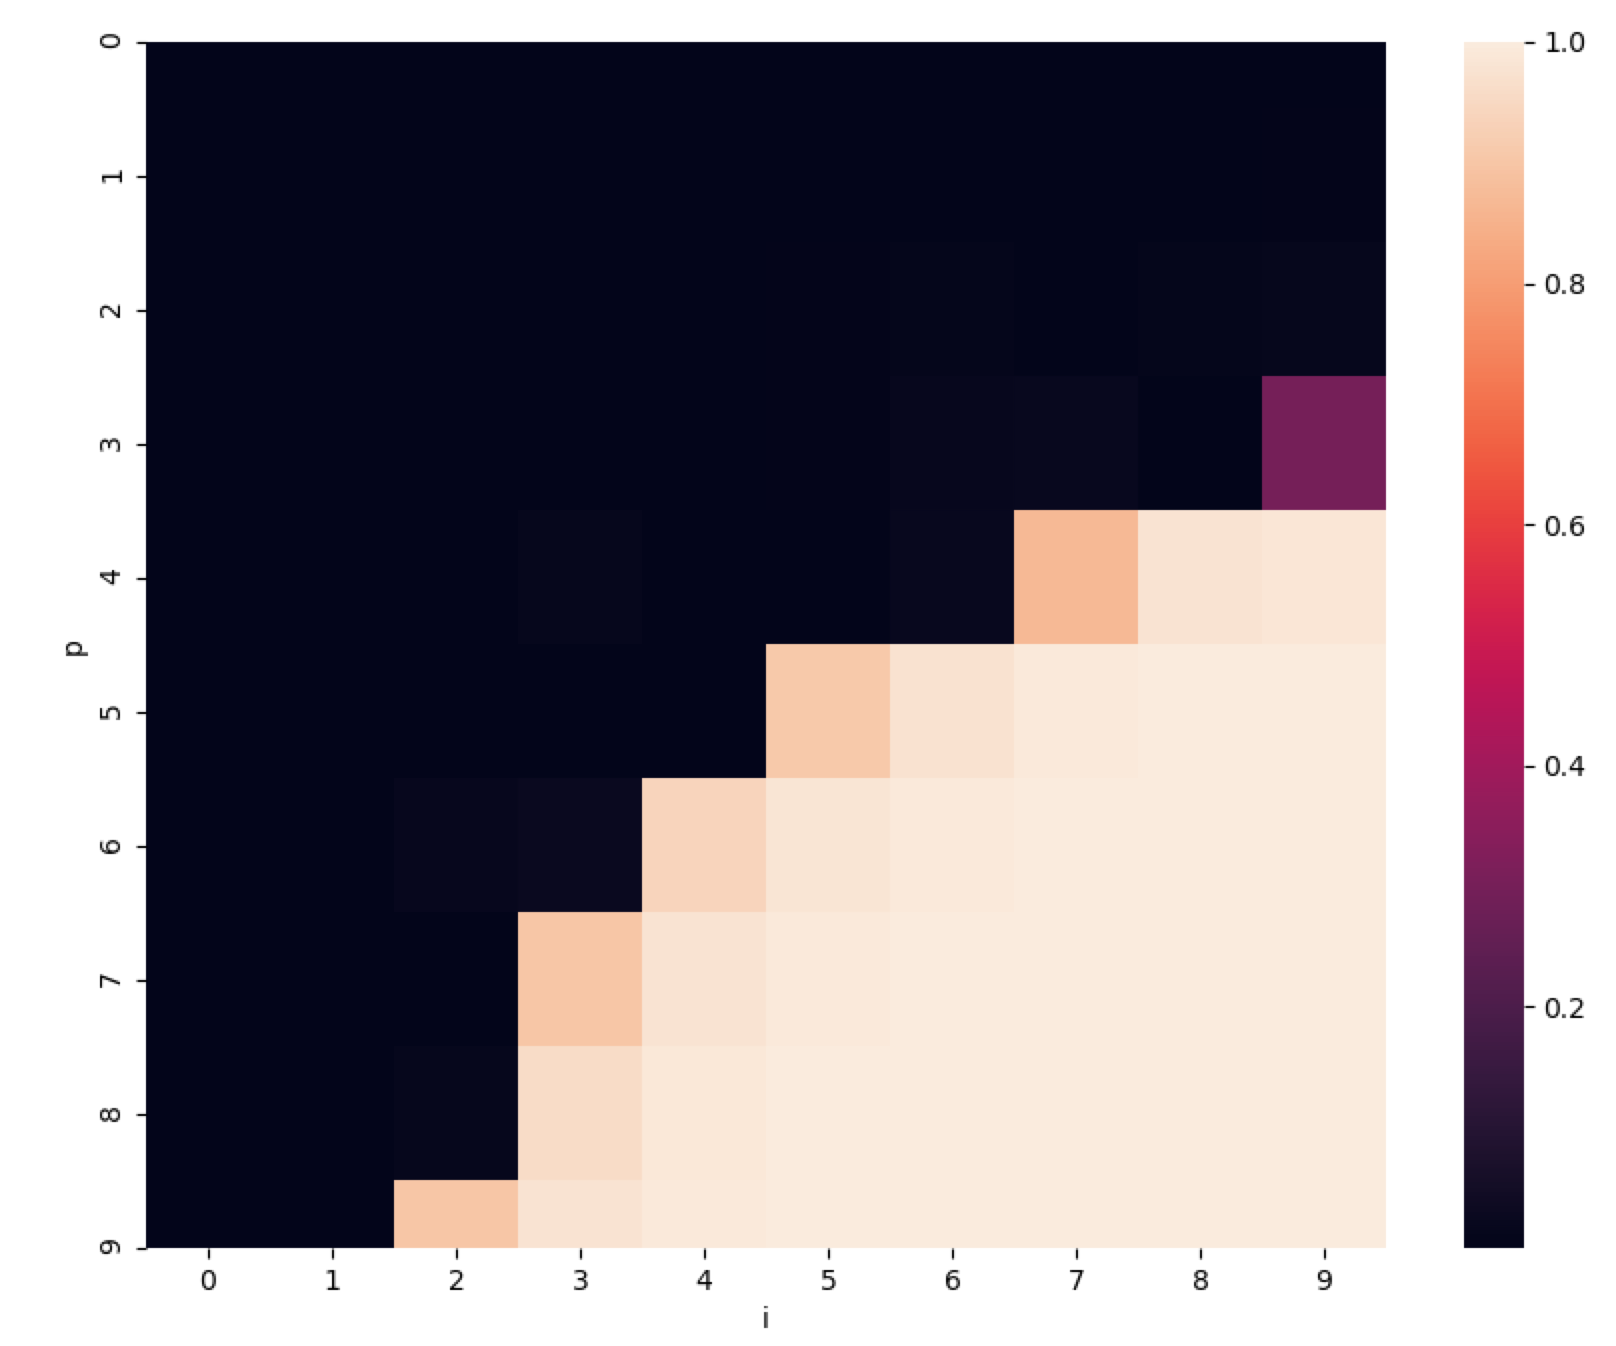

The rows show q and columns show i, both in the format x/10. light colours represent high percolation rate, dark represents low. As indicated by the drastic transition from dark to light colours in the heatmap, there is a rather sharp, seemingly non-linear percolation threshold for the values of q and i. 

This is in agreement with our intuition: for low ignition rate and low tree density, we are unlikely to see the fire spread; the opposite for high i and q; 
It does seem, however, that the ignition rate is more important than the density of trees for reaching high percolation. We can see this by considering where the black squares intersect the bottom and right edges. Provided the ignition rate is 1, we can achieve high percolation with 0.4 tree density. However, with tree density 1, a ignition rate of 0.2 suffices to achieve hich percolation.

## Using renormalization groups to estimate long-term percolation behavior analytically

I did this bit in Mathematica, you can access the work product here: https://drive.google.com/file/d/1Eyj9rA1S97kys1Dwk-PtyyV_1rnaoAsx/view?usp=sharing

In summary, we see that the analytical approximation is actually quite good. And vastly more precise (it would require many, iteratively refined runs of the simulation to get such a smooth estimate of the critical threshhold).